In [ ]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def sigmoid(x):
  return 1/(1+np.e^(-x))

for i in range(-100,100):
  print(sigmoid(i))

In [ ]:
plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams.update({'font.size': 14})

# **Mean Squared Error**

**Mean squared error (MSE) is the sum of squared differences
between the predicted and true values. As the error rate increases, the MSE penalty grows quadratically, which heavily penalizes a model. A downside to MSE is if applied to a data set with a few outliers, it can heavily penalize a model.**

**MSE is one of the most popular tools to measure how accurate models are within statistics and machine learning.**

**Within Machine Learning, MSE is used as a loss function or part of a loss function that an algorithm minimizes.**

### $MSE = \displaystyle \frac{1}{N}\sum_{i=0}^N (y_i - \hat{y_i})^2 = \displaystyle \frac{1}{N}\sum_{i=0}^N (error_i)^2$

### $\text{Where: $N$=number of observed values, $y_i$ = observed target value, $\hat{y}=$ predicted}$

### $\text{target value.}$

Source: [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Machine Learning/Machine Learning with Python! Mean Squared Error (MSE)/nba_draft_combine_all_years.csv')

Data Source: [data.world](https://data.world/achou/nba-draft-combine-measurements)

In [ ]:
df.head()

,Player,Year,Weight,Height (No Shoes)
0,Tyler Ulis,2016,149,68.75
1,Russ Smith,2014,160,71.50
2,Eric Maynor,2009,164,74.25
3,Marcus Paige,2016,164,72.50
4,Dennis Schroeder,2013,165,73.00


## **Exploratory Data Analysis**

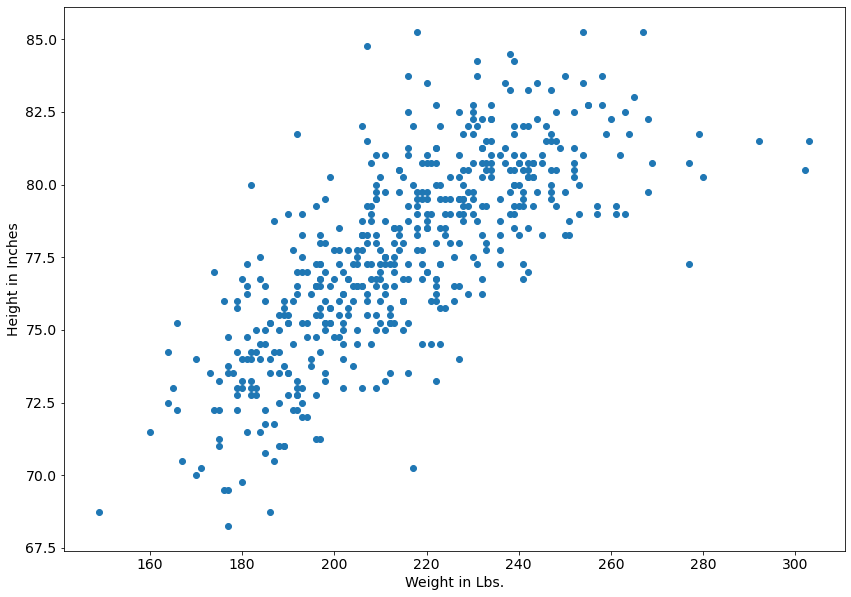

In [ ]:
plt.scatter(df['Weight'], df['Height (No Shoes)'])
plt.xlabel('Weight in Lbs.')
plt.ylabel('Height in Inches');

In [ ]:
df.corr()['Height (No Shoes)']

Year                 0.007057
Weight               0.741515
Height (No Shoes)    1.000000
Name: Height (No Shoes), dtype: float64

## **Modeling and Forecasting**

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Weight'].to_numpy(),df['Height (No Shoes)'].to_numpy(), test_size=0.25, random_state=5)

#linear regression model
linear_reg = LinearRegression()
#decision tree model
decision_tree = tree.DecisionTreeRegressor()

#fit/predict data
linear_reg.fit(X_train.reshape(-1, 1), y_train)
decision_tree = decision_tree.fit(X_train.reshape(-1, 1),y_train)
linreg_heights = linear_reg.predict(X_test.reshape(-1, 1))
d_tree_heights = decision_tree.predict(X_test.reshape(-1, 1))
df_predict = pd.DataFrame({'Weight':X_test,'Actual Height':y_test,'Lin Reg Predicted Height':linreg_heights, 'Decision Tree Predicted Height':d_tree_heights})

In [ ]:
df_predict

,Weight,Actual Height,Lin Reg Predicted Height,Decision Tree Predicted Height
0,223,82.00,78.420682,77.535714
1,227,79.50,78.827627,78.964286
2,227,78.00,78.827627,78.964286
3,199,75.25,75.979008,78.375000
4,216,81.25,77.708527,77.083333
...,...,...,...,...
124,206,82.00,76.691163,76.950000
125,182,74.25,74.249490,74.937500
126,196,74.75,75.673799,76.041667
127,170,74.00,73.028653,70.000000


## **Model Error Calculation**

In [ ]:
df_predict['Forecast Error Lin Reg'] = df_predict['Actual Height'] - df_predict['Lin Reg Predicted Height']
df_predict['Forecast Error Decision Tree'] = df_predict['Actual Height'] - df_predict['Decision Tree Predicted Height']

In [ ]:
df_predict

,Weight,Actual Height,Lin Reg Predicted Height,Decision Tree Predicted Height,Forecast Error Lin Reg,Forecast Error Decision Tree
0,223,82.00,78.420682,77.535714,3.579318,4.464286
1,227,79.50,78.827627,78.964286,0.672373,0.535714
2,227,78.00,78.827627,78.964286,-0.827627,-0.964286
3,199,75.25,75.979008,78.375000,-0.729008,-3.125000
4,216,81.25,77.708527,77.083333,3.541473,4.166667
...,...,...,...,...,...,...
124,206,82.00,76.691163,76.950000,5.308837,5.050000
125,182,74.25,74.249490,74.937500,0.000510,-0.687500
126,196,74.75,75.673799,76.041667,-0.923799,-1.291667
127,170,74.00,73.028653,70.000000,0.971347,4.000000



## **Mean Squared Error Calculation**

## $MSE = \frac{1}{N} \displaystyle \sum_{i=0}^N (error_i)^2$

In [ ]:
#%%timeit
sum([(x**2)*(1/len(df_predict)) for x in df_predict['Forecast Error Lin Reg']])

## $MSE = \frac{1}{N} \ error^{\text{T}}error$

$\text{Where: }error= [error_1, error_2, ... , error_N]$

In [ ]:
#%%timeit
np.dot(df_predict['Forecast Error Lin Reg'], df_predict['Forecast Error Lin Reg'])*(1/len(df_predict))

### **Using scikit-learn's `mean_squared_error` function**

In [ ]:
#%%timeit
mean_squared_error(df_predict['Actual Height'], df_predict['Lin Reg Predicted Height'])

In [ ]:
def mse(error_array):
  return np.dot(error_array, error_array)*(1/len(error_array))

In [ ]:
mse(df_predict['Forecast Error Lin Reg'])

## **Graphing the Error**

In [ ]:
weight_range = np.arange(df['Weight'].min(),df['Weight'].max())
height_range_lr = linear_reg.predict(weight_range.reshape(-1,1))

In [ ]:
fig = px.scatter(df_predict, x='Weight',y='Actual Height', title='Linear Regression Model')
fig.add_trace(go.Scatter(x=weight_range,y=height_range_lr,mode="lines",name='Linear Regression Model'))
fig.show()

In [ ]:
height_range_d = decision_tree.predict(weight_range.reshape(-1,1))

In [ ]:
fig = px.scatter(df_predict, x='Weight',y='Actual Height', title='Decision Tree Model')
fig.add_trace(go.Scatter(x=weight_range,y=height_range_d,mode="lines",name='Decision Tree Model'))
fig.show()

In [ ]:
df_predict.sort_values('Weight')

## **Iterating to find the minimum Mean Squared Error for a parameter in a Linear Regression Model**

**Linear Regression model for NBA Player Heights: Height = Intercept + $\\beta_1$(Weight)=**

**Height = 55.73 + 0.1017(Weight)**

In [ ]:
mse_list = []

for num in np.arange(30,70,.001):
  mse_list.append(mse(df_predict['Weight'] * linear_reg.coef_[0] + num - df_predict['Actual Height']))

In [ ]:
plt.scatter(np.arange(30,70,.001)[mse_list.index(min(mse_list))], min(mse_list), color='red', s=250,
            label = f'Intercept Estimate: {np.arange(30,70,.001)[mse_list.index(min(mse_list))]:.2f}\nMean Squared Error: {min(mse_list):.2f}',zorder=2)
plt.plot(np.arange(30,70,.001), mse_list, lw = 7,zorder=1)
plt.xlabel('Intercept Estimate')
plt.ylabel('Mean Squared Error')
plt.legend();

In [ ]:
linear_reg.intercept_

# **References and Additional Learning**

## **Data Set**

- **[NBA Draft Combine Measurements from data.world](https://data.world/achou/nba-draft-combine-measurements)**


## **Textbook**
- **[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido**


## **Websites**

- **[scikit-learn Documentation](https://scikit-learn.org/0.21/documentation.html)**

# **Connect**

- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717)**